# EDA Q3: Which features are most correlated with Price?

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Cleaned Data

In [90]:
data = pd.read_csv('csv_files/added_features_data.csv',index_col=0)
dummy_data = pd.read_csv('csv_files/dummy_data.csv',index_col=0)
final_data = pd.concat([data,dummy_data],axis=1)

In [91]:
final_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,538000.0,3,2.25,2570,7242,2.0,2170,47.7210,-122.319,1690,7639,9812,2570.0,63,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,571000.0,4,2.00,2750,7807,1.5,2250,47.7168,-122.287,1510,7807,10557,2750.0,98,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,315000.0,3,1.00,960,6634,1.0,960,47.7264,-122.310,1570,7203,7594,960.0,62,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,382500.0,2,1.00,1190,4440,1.0,1190,47.7135,-122.287,1060,5715,5630,1190.0,33,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,425000.0,3,1.75,2500,6840,1.0,1300,47.7222,-122.320,1580,8691,9340,2500.0,57,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 2. Linearity between Features and Price

The linearity assumptions requires that there is a linear relationship between the response variable (Y) and predictor (X). Linear means that the change in Y by 1-unit change in X, is constant.

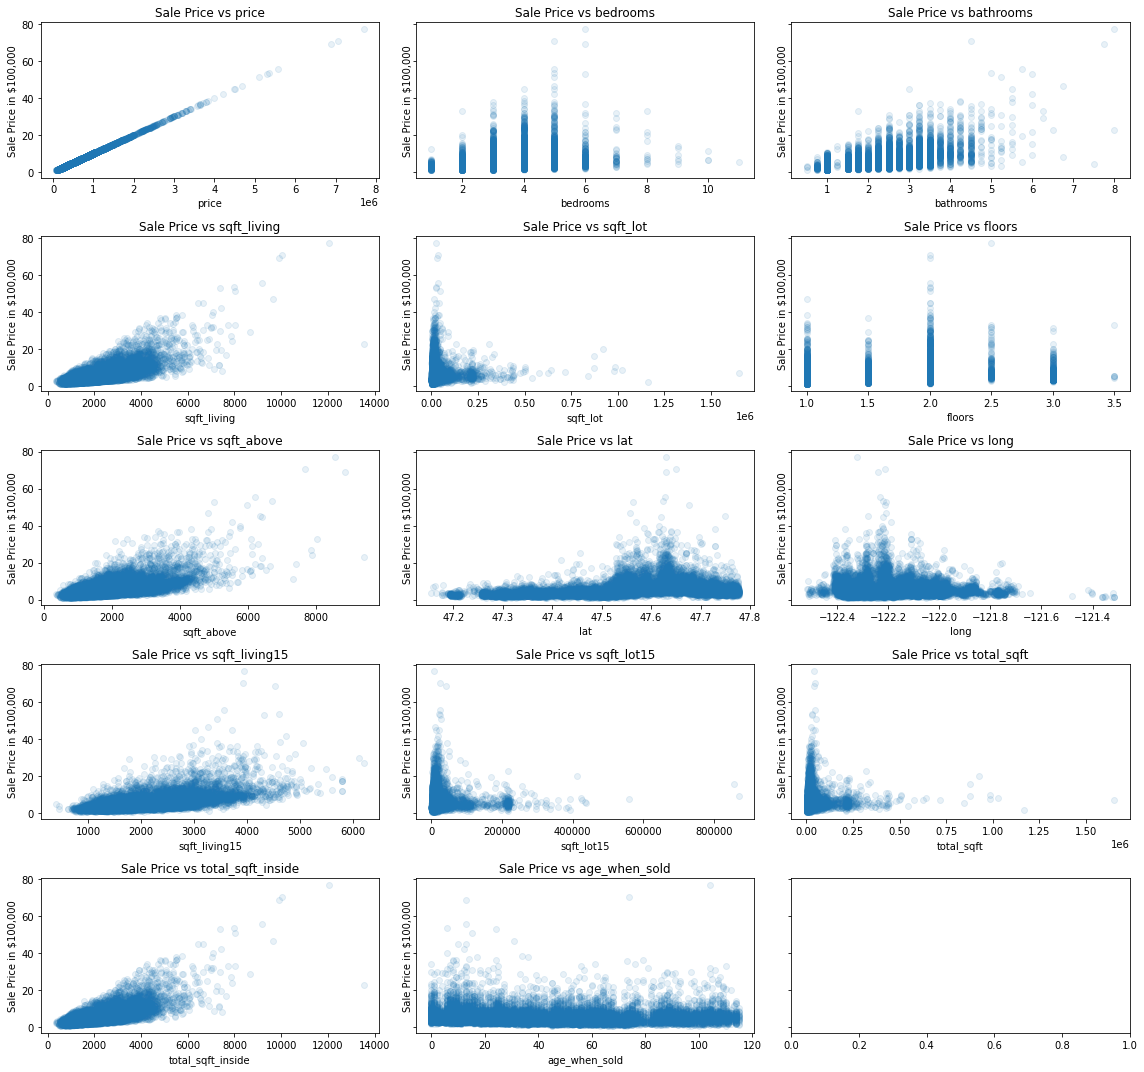

In [92]:
# plotting linearity between feature and price
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [93]:
# checking correlation between each feature and price
final_data.corr()['price'].sort_values(ascending=False)

price                1.000000
sqft_living          0.704079
total_sqft_inside    0.702235
sqft_above           0.608251
sqft_living15        0.580673
                       ...   
decade_built_1960   -0.085828
grade_binned_Poor   -0.087692
city_Renton         -0.102187
city_FederalWay     -0.132005
city_Kent           -0.159633
Name: price, Length: 66, dtype: float64

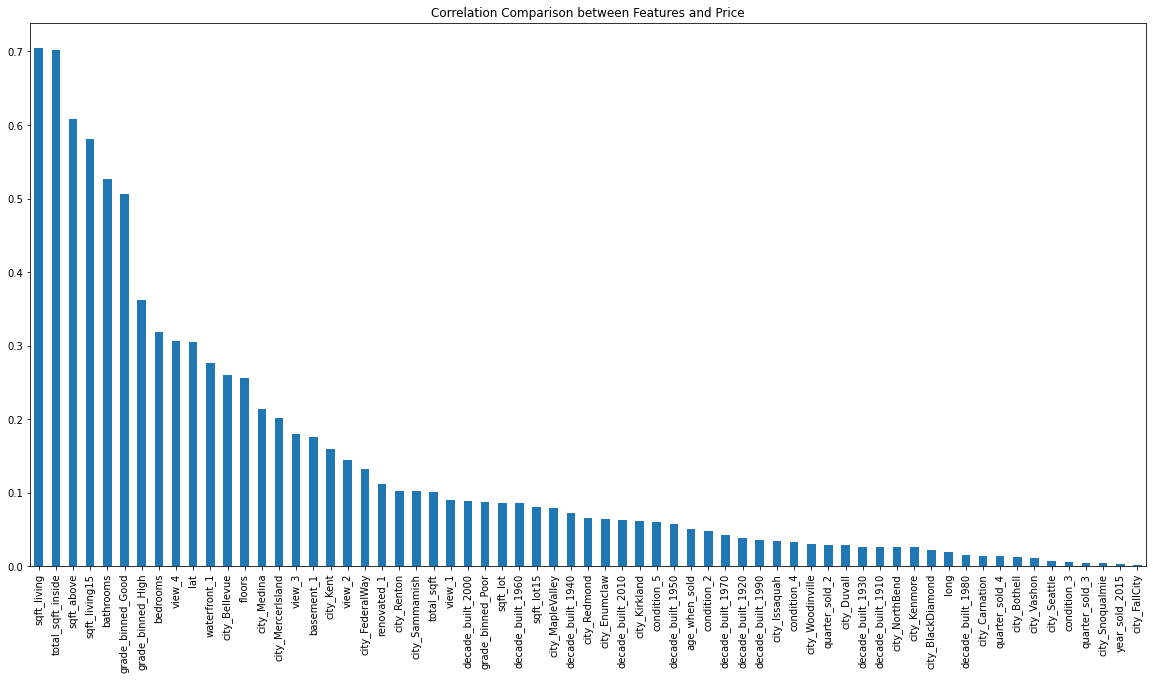

In [94]:
# plotting correlation between each feature and price
plt.figure(figsize=(20,10))
abs(final_data.corr())['price'].drop(['price']).sort_values(ascending=False).plot(kind='bar').set_title(
    'Correlation Comparison between Features and Price');
plt.savefig('images/EDA_3_bar.png')
plt.show()

# Check Multicollinearity

In [95]:
pd.set_option('display.max_columns',100)
data_corr = final_data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_inside,age_when_sold,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,year_sold_2015,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
price,1.000000,0.318083,0.526786,0.704079,0.085975,0.256381,0.608251,0.304657,0.019184,0.580673,0.080577,0.101436,0.702235,-0.050806,0.276849,0.090285,0.144799,0.179507,0.306532,-0.048381,0.006065,-0.032700,0.060649,0.029429,-0.004704,-0.013226,0.003463,0.026311,0.038801,0.026327,-0.072581,-0.057872,-0.085828,-0.043024,-0.014794,0.035309,0.088610,0.063345,0.506284,0.362592,-0.087692,0.111124,0.175643,0.260016,-0.021416,-0.012878,-0.014485,-0.028421,-0.064194,0.001086,-0.132005,0.033858,-0.025776,-0.159633,0.060783,-0.079555,0.213687,0.201174,-0.026064,0.066053,-0.102187,0.101691,-0.007015,-0.004327,-0.011014,0.029701
bedrooms,0.318083,1.000000,0.531992,0.595721,0.030724,0.188909,0.496046,-0.014796,0.136647,0.407020,0.029038,0.043979,0.592579,-0.163087,-0.002397,0.022546,0.046584,0.055732,0.039632,-0.048999,0.008762,-0.010592,0.021733,0.007934,-0.004227,-0.002733,-0.008228,-0.042762,-0.065108,-0.055509,-0.169584,-0.050427,0.085843,0.068415,-0.003438,0.060909,0.034763,0.079417,0.260194,0.078587,-0.134766,0.016604,0.158375,0.134085,-0.006489,0.016434,-0.028298,0.001586,-0.028515,-0.006860,0.005341,0.023459,0.011648,0.020626,0.032073,0.012648,0.035734,0.085880,-0.011927,0.017940,0.040279,0.078698,-0.190361,0.021539,-0.045693,0.025772
bathrooms,0.526786,0.531992,1.000000,0.756165,0.084703,0.505518,0.687808,0.024355,0.222294,0.569531,0.085618,0.101339,0.753618,-0.506562,0.067293,0.038375,0.084302,0.111994,0.107205,-0.072610,0.192407,-0.170154,-0.033598,0.013606,0.014200,-0.006305,-0.027544,-0.105832,-0.136208,-0.077368,-0.242799,-0.221618,-0.117816,0.008605,0.086348,0.204535,0.312617,0.195150,0.457047,0.189727,-0.149151,0.043186,0.159367,0.101442,-0.009219,0.021144,-0.002478,0.023102,-0.031677,0.000330,-0.015384,0.097238,0.002957,-0.008457,0.025600,0.056384,0.066743,0.090514,0.004718,0.080013,0.007223,0.121878,-0.238923,0.067465,-0.019117,0.042038
sqft_living,0.704079,0.595721,0.756165,1.000000,0.172611,0.356144,0.877586,0.052232,0.238001,0.755439,0.182441,0.194361,0.996375,-0.316518,0.110329,0.066002,0.132531,0.158249,0.172620,-0.059206,0.100275,-0.084620,-0.016029,0.009542,0.011868,0.000126,-0.029790,-0.068296,-0.085616,-0.045180,-0.182939,-0.129961,-0.063859,0.022751,0.043146,0.150249,0.182877,0.113065,0.588699,0.283394,-0.137136,0.045411,0.197559,0.167119,0.005467,0.017989,0.009793,0.011780,-0.029066,0.012839,-0.026022,0.063193,0.002468,-0.038352,0.016322,0.010281,0.092191,0.127130,-0.000733,0.089050,0.008269,0.154662,-0.257371,0.063908,-0.014671,0.078553
sqft_lot,0.085975,0.030724,0.084703,0.172611,1.000000,-0.007760,0.183564,-0.086333,0.230078,0.145537,0.722913,0.999755,0.172409,-0.055426,0.023107,-0.011323,0.041451,0.064492,0.019990,0.045866,-0.009740,0.012872,-0.019698,-0.000011,-0.008045,0.001775,0.006799,-0.028146,-0.032805,-0.003201,-0.031279,-0.026621,-0.009600,0.037178,0.065375,0.077196,-0.008814,-0.053324,0.107867,0.063487,0.019102,0.002931,-0.036829,-0.011388,0.071890,-0.008306,0.169375,0.055707,0.148852,0.116105,-0.021876,0.025496,-0.008635,0.000279,-0.025931,0.035265,0.003104,-0.003873,0.089718,0.030769,-0.008066,0.007922,-0.177367,0.008277

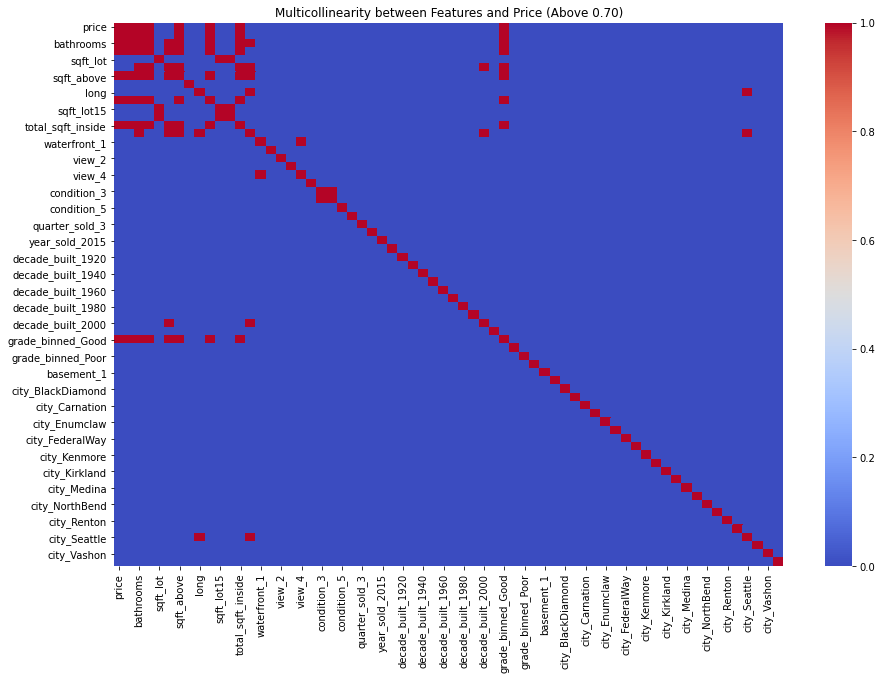

In [96]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(data_corr.corr()) > 0.70, cmap='coolwarm').set_title('Multicollinearity between Features and Price (Above 0.70)')
plt.savefig('images/EDA_3_multicollinearity.png')
plt.show();

In [97]:
# fig, ax = plt.subplots(figsize=(15,10)) 
# sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
# plt.savefig('images/EDA_3_multicollinearity.png')
# plt.show()